In [1]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="urubu100",
  password="urubu100",
  database="cortisol"
)
cursor = mydb.cursor()
print(mydb)

In [1]:
import azure.iot.device as iotDevice

hub = iotDevice.IoTHubDeviceClient.create_from_connection_string('HostName=guilherme02221070.azure-devices.net;DeviceId=guilherme02221070;SharedAccessKey=vH+aXm72QJP8vfYq7zBNs1OWwfUDLR31aAIoTEhMhPI=')
hub.connect()

Mensagen: {"messageId": 0, "rangeTime": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], "cortisolList": [5.573786383345459, 3.7423216073880026, 3.8429276073478067, 4.781915669628357, 4.801724808710224, 5.354497175121321, 18.726727254641073, 12.446658205599805, 19.609504001207313, 14.00886226359298, 19.63236530333659, 20.114958898424007, 20.94123365844662, 10.527846831010566, 20.65092744456391, 8.374541265959014, 17.142495266469197, 21.51422401122632, 14.512559183098807, 5.402179462448006, 3.0187487749372415, 3.2680113730460625, 3.432078305506998, 5.258254365955907]}
Bytes Mensagem: 643
Erro ao enviar mensagem: name 'hub' is not defined


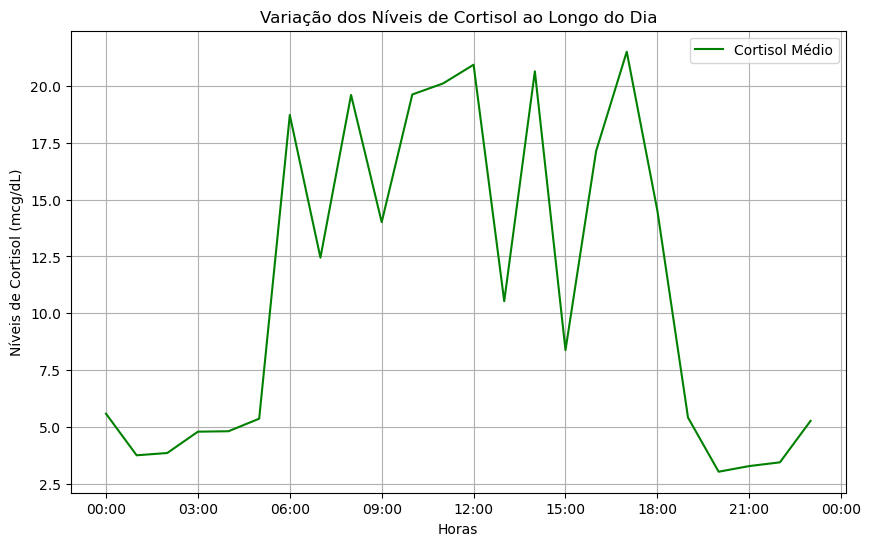

Mensagen: {"messageId": 0, "rangeTime": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], "cortisolList": [5.636956979891087, 4.4535973385469365, 5.204190876162775, 5.46106218081632, 3.684862192364057, 4.763440280412457, 14.46553619107363, 21.242310487732425, 21.89891456302651, 22.01212125673966, 7.754112836450804, 6.557684260222565, 11.941733930417039, 21.88906783756034, 20.697065794852886, 14.3628324847687, 21.724010329211822, 16.87209986115919, 11.156691887806138, 4.892847181317238, 5.415745489803156, 4.819799991271213, 3.3434956892079684, 5.760498031885538]}
Bytes Mensagem: 637
Erro ao enviar mensagem: name 'hub' is not defined


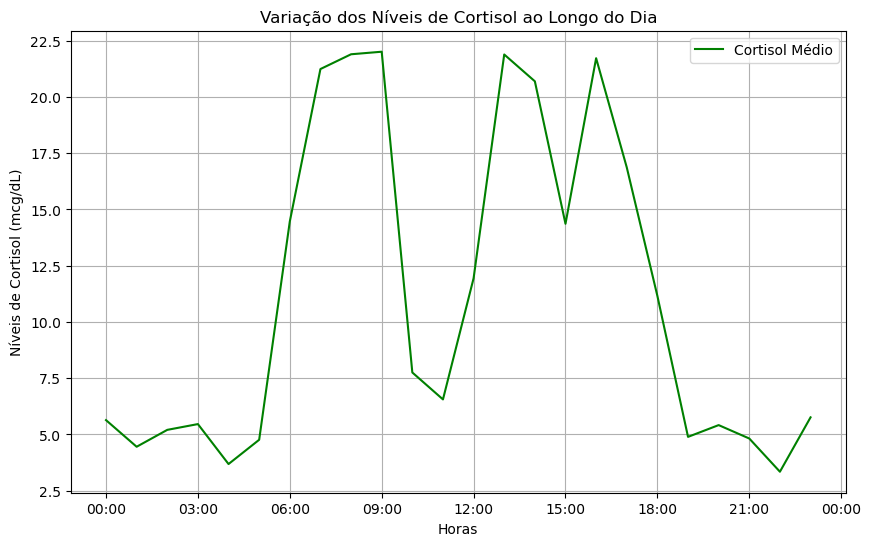

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import random
import json
import sys

def gerarDados(qtdPessoas):
    for pessoa in range(qtdPessoas):
        horas = list(range(24))
        cortisol_medio = []
        messageId = 0
        for hora in horas:
            if hora < 6 or hora > 18:  # Noite
                cortisol = random.uniform(3, 6)
            else:  # Dia
                cortisol = random.uniform(6, 23)
            cortisol_medio.append(cortisol)

            data_hora = datetime(2024, 1, 1, hora, 0)  

            # sql = "INSERT INTO dados_cortisol (dado_cortisol, data_horario, id_pessoa) VALUES (%s, %s, %s)"
            # valores = (cortisol, data_hora, pessoa)

            # cursor.execute(sql, valores)

        message = {
            'messageId': messageId,
            'rangeTime': horas,
            'cortisolList': cortisol_medio
        }

        jsonMessage = json.dumps(message)

        print(f'Mensagen: {jsonMessage}')
        print(f'Bytes Mensagem: {sys.getsizeof(jsonMessage)}')

        try:
            hub.send_message(jsonMessage)
        except Exception as e:
            print(f'Erro ao enviar mensagem: {e}')

        messageId + 1

        # mydb.commit()

        # cursor.close()
        # mydb.close()


        # Convertendo as horas para o formato de data/hora
        horas_formatadas = [datetime(2024, 1, 1, hora, 0) for hora in horas]

        plt.figure(figsize=(10, 6))
        plt.plot(horas_formatadas, cortisol_medio, label='Cortisol Médio', color='green')

        # Formatando o eixo x como horas
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

        plt.xlabel('Horas')
        plt.ylabel('Níveis de Cortisol (mcg/dL)')
        plt.title('Variação dos Níveis de Cortisol ao Longo do Dia')

        plt.legend()
        plt.grid(True)

        plt.show()

gerarDados(2)
